# **INTRODUCTION**
Understanding and predicting GDP (Gross Domestic Product) is crucial for policymakers, economists, and businesses. GDP serves as a primary indicator of a country's economic health, representing the total value of all goods and services produced over a specific period. Accurately predicting GDP can help in making informed decisions related to fiscal policies, investment strategies, and economic planning. In this project, we will perform a comprehensive time series analysis of GDP prediction, utilizing various economic indicators, visualizations, and a forecasting model.

## **DATASET DESCRIPTION**

The project utilizes a rich dataset containing a wide range of economic indicators, including GDP per capita, unemployment rate, inflation rate, foreign investment, and more. The dataset spans multiple years and countries, providing a comprehensive view of global economic trends.

### **EXPLORATORY DATA ANALYSIS**

In [88]:
## IMPORTING THE LIBRARIES

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


In [25]:
## LOADING THE DATA

df = pd.read_csv("gdp_df_final.csv")
df.head()

,ISO3,Year,gdp_real_gwt_next,gdp_real_gwt_prev,gdp_real_gwt,gdp_real_us_fixed,gdp_per_capita,gdp_pp_govt,gdp_pp_private,inflation_pp,...,agric_land,agff_gdp,arable_land,rural_pop,electricity_access,fuel_exports,metal_exports,co2_emissions,industry_gdp,service_value_added
0,ZMB,2001,4.506014,3.897323,5.316868,8.487518e+09,793.804887,NaN,NaN,25.331258,...,30.340736,15.527482,3.661604,64.998,20.172386,1.155972,60.421526,0.172088,23.360612,4467.040050
1,VUT,2001,-5.198319,5.924809,-3.397582,5.068359e+08,2678.709047,20.512273,76.512807,3.624906,...,14.520098,23.529883,1.640689,78.047,23.943880,NaN,NaN,0.475664,9.047492,NaN
2,UZB,2001,3.973488,3.835000,4.163838,3.278312e+10,1313.192271,18.500010,57.826082,45.239476,...,62.684814,29.973809,10.279621,53.394,99.630104,NaN,NaN,5.035160,19.952084,2730.392153
3,URY,2001,-7.732007,-1.929931,-3.844130,3.218762e+10,9679.115577,12.492042,75.880212,4.826618,...,85.487373,5.586703,7.867672,7.697,97.785393,1.944998,0.578067,1.488511,21.935134,20931.279347
4,USA,2001,1.695943,4.077159,0.954339,1.388556e+13,48726.581673,14.535638,66.847930,2.252952,...,45.290070,1.129257,19.144459,20.766,100.000000,1.880775,1.912058,20.171531,21.469004,100596.153467


In [26]:
df.columns

Index(['ISO3', 'Year', 'gdp_real_gwt_next', 'gdp_real_gwt_prev',
       'gdp_real_gwt', 'gdp_real_us_fixed', 'gdp_per_capita', 'gdp_pp_govt',
       'gdp_pp_private', 'inflation_pp', 'unemployment', 'renew_energy',
       'agric_employment', 'vulnerable_employment', 'imports', 'exports',
       'foreign_inv', 'real_interest_rate', 'cab', 'population', 'pop_density',
       'pop_growth', 'life_expectancy', 'death_rate', 'child_mortality',
       'renewable_energy_output', 'agric_land', 'agff_gdp', 'arable_land',
       'rural_pop', 'electricity_access', 'fuel_exports', 'metal_exports',
       'co2_emissions', 'industry_gdp', 'service_value_added'],
      dtype='object')

In [27]:
df.shape

(2780, 36)

In [28]:
## CHECKING THE NULL VALUES IN EACH COLUMN

df.isnull().sum()

ISO3                         0
Year                         0
gdp_real_gwt_next            0
gdp_real_gwt_prev            0
gdp_real_gwt                 0
gdp_real_us_fixed            0
gdp_per_capita               0
gdp_pp_govt                134
gdp_pp_private             134
inflation_pp                 0
unemployment               851
renew_energy               139
agric_employment           196
vulnerable_employment      196
imports                     99
exports                     99
foreign_inv                  1
real_interest_rate         813
cab                         82
population                   0
pop_density                  0
pop_growth                   0
life_expectancy             19
death_rate                  15
child_mortality             20
renewable_energy_output    691
agric_land                   0
agff_gdp                    25
arable_land                  0
rural_pop                    0
electricity_access           1
fuel_exports               303
metal_ex

In [29]:
## HANDLING MISSING VALUES
## DROP THE ROWS WITH THE MISSING VALUES

df.dropna(inplace = True)

In [30]:
df.shape

(847, 36)

In [31]:
## BASIC STATISTICS OF THE DATASET

df.describe()

,Year,gdp_real_gwt_next,gdp_real_gwt_prev,gdp_real_gwt,gdp_real_us_fixed,gdp_per_capita,gdp_pp_govt,gdp_pp_private,inflation_pp,unemployment,...,agric_land,agff_gdp,arable_land,rural_pop,electricity_access,fuel_exports,metal_exports,co2_emissions,industry_gdp,service_value_added
count,847.000000,847.000000,847.000000,847.000000,8.470000e+02,847.000000,847.000000,847.000000,847.000000,847.000000,...,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,2008.505313,3.710623,3.948381,3.803532,6.542374e+11,13263.363159,15.299322,64.340830,6.148306,8.113495,...,38.561581,8.536883,15.239179,36.659228,89.836069,14.452828,9.086268,4.519422,27.404100,26491.598295
std,4.310322,3.492562,3.533816,3.436352,2.206221e+12,16491.928005,4.668061,12.979853,7.918950,5.958840,...,20.305636,7.382161,13.827397,19.696154,20.389735,22.076082,14.217591,4.251927,8.313777,28533.393471
min,2001.000000,-20.598771,-8.130444,-7.799994,9.550715e+08,306.468825,5.075326,30.182680,-18.844957,0.290000,...,0.501923,0.032614,0.344079,0.000000,4.800000,0.000000,0.000300,0.022151,8.413911,760.060448
25%,2005.000000,1.913257,2.118644,1.968336,1.546235e+10,3132.697992,11.447467,55.805485,2.062252,4.305000,...,21.395378,3.157186,4.096741,20.151000,89.045002,1.436342,1.430323,1.390865,21.724209,8408.623397
50%,2009.000000,3.770962,4.077159,3.789393,5.770656e+10,5629.419867,14.830718,64.301527,4.386709,6.720000,...,40.997230,6.600551,11.670782,34.511000,99.361610,5.711195,3.292700,2.970024,25.370403,15002.385201
75%,2012.000000,5.558171,5.804902,5.603660,2.995857e+11,13430.580845,18.864697,73.187522,7.952419,9.600000,...,49.617057,11.994358,21.204380,51.049000,100.000000,15.097891,8.894951,6.679609,31.858819,28491.658913
max,2019.000000,34.500000,34.500000,34.500000,1.820602e+13,84776.142166,40.553525,100.830987,85.353275,37.250000,...,85.487373,51.792529,63.209649,89.882000,100.000000,98.400410,86.419619,22.213351,66.121190,145481.317448


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 3 to 2576
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ISO3                     847 non-null    object 
 1   Year                     847 non-null    int64  
 2   gdp_real_gwt_next        847 non-null    float64
 3   gdp_real_gwt_prev        847 non-null    float64
 4   gdp_real_gwt             847 non-null    float64
 5   gdp_real_us_fixed        847 non-null    float64
 6   gdp_per_capita           847 non-null    float64
 7   gdp_pp_govt              847 non-null    float64
 8   gdp_pp_private           847 non-null    float64
 9   inflation_pp             847 non-null    float64
 10  unemployment             847 non-null    float64
 11  renew_energy             847 non-null    float64
 12  agric_employment         847 non-null    float64
 13  vulnerable_employment    847 non-null    float64
 14  imports                  847 n

In [33]:
## CORRELATION

df.drop(["ISO3"], axis = 1).corr()

,Year,gdp_real_gwt_next,gdp_real_gwt_prev,gdp_real_gwt,gdp_real_us_fixed,gdp_per_capita,gdp_pp_govt,gdp_pp_private,inflation_pp,unemployment,...,agric_land,agff_gdp,arable_land,rural_pop,electricity_access,fuel_exports,metal_exports,co2_emissions,industry_gdp,service_value_added
Year,1.000000,-0.184912,-0.088039,-0.111446,-0.001199,0.025890,0.003058,0.001837,-0.127190,-0.053811,...,0.014762,0.005197,-0.013394,-0.000691,-0.015004,0.090735,0.067618,-0.056642,-0.053435,0.007531
gdp_real_gwt_next,-0.184912,1.000000,0.281944,0.506602,-0.137808,-0.243821,-0.216758,-0.025009,0.112170,-0.051986,...,0.006386,0.156944,-0.007615,0.175131,-0.111900,0.102332,-0.050894,-0.196806,0.258323,-0.267766
gdp_real_gwt_prev,-0.088039,0.281944,1.000000,0.492419,-0.136309,-0.231672,-0.240048,-0.034831,0.136061,-0.127709,...,0.027289,0.204179,0.013927,0.173901,-0.113562,0.176514,0.050245,-0.159555,0.298754,-0.267086
gdp_real_gwt,-0.111446,0.506602,0.492419,1.000000,-0.142064,-0.251929,-0.273346,-0.020522,0.167546,-0.090949,...,0.043271,0.229126,0.016518,0.203787,-0.143720,0.136402,0.028867,-0.195109,0.286066,-0.284542
gdp_real_us_fixed,-0.001199,-0.137808,-0.136309,-0.142064,1.000000,0.438549,0.066078,-0.041844,-0.119105,-0.087171,...,-0.001227,-0.237465,0.023082,-0.221679,0.128448,-0.054710,-0.099730,0.521866,-0.109610,0.518490
gdp_per_capita,0.025890,-0.243821,-0.231672,-0.251929,0.438549,1.000000,0.287379,-0.438263,-0.279987,-0.193354,...,-0.228629,-0.547047,-0.142418,-0.607518,0.331373,-0.125688,-0.091618,0.665490,-0.200923,0.980860
gdp_pp_govt,0.003058,-0.216758,-0.240048,-0.273346,0.066078,0.287379,1.000000,-0.138479,-0.091953,0.267619,...,0.005790,-0.299682,0.015994,-0.226690,0.111117,-0.109807,0.013071,0.334126,-0.270613,0.295238
gdp_pp_private,0.001837,-0.025009,-0.034831,-0.020522,-0.041844,-0.438263,-0.138479,1.000000,0.068476,0.231033,...,0.327728,0.495789,0.196556,0.508690,-0.206500,-0.392487,0.106617,-0.472140,-0.470397,-0.392463
inflation_pp,-0.127190,0.112170,0.136061,0.167546,-0.119105,-0.279987,-0.091953,0.068476,1.000000,-0.066076,...,0.144290,0.190065,0.098311,0.160833,-0.103451,0.112266,-0.027710,-0.176900,0.164496,-0.297317
unemployment,-0.053811,-0.051986,-0.127709,-0.090949,-0.087171,-0.193354,0.267619,0.231033,-0.066076,1.000000,...,0.128725,-0.106322,-0.112097,0.084468,0.073535,-0.061208,0.139486,-0.050314,-0.158843,-0.135263


In [34]:
## ASSIGNING FEATURES AND TARGET VALUES

X = df.drop(["ISO3", "gdp_real_gwt_next"], axis = 1)
y = df["gdp_real_gwt_next"]

### **FEATURE SELECTION**

In [35]:
## SELECTING THE BEST FEATURES

selector = SelectKBest(f_regression, k=15)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Year', 'gdp_real_gwt_prev', 'gdp_real_gwt', 'gdp_per_capita',
       'gdp_pp_govt', 'agric_employment', 'vulnerable_employment',
       'foreign_inv', 'life_expectancy', 'child_mortality', 'agff_gdp',
       'rural_pop', 'co2_emissions', 'industry_gdp', 'service_value_added'],
      dtype='object')


In [36]:
selected_features = ['Year', 'gdp_real_gwt_next', 'gdp_real_gwt', 'gdp_per_capita', 'gdp_pp_govt', 'agric_employment', 'vulnerable_employment', 'foreign_inv', 'life_expectancy', 'child_mortality', 'agff_gdp', 'rural_pop', 'co2_emissions', 'industry_gdp', 'service_value_added']

selected_features_with_target = ['Year', 'gdp_real_gwt_next', 'gdp_real_gwt_prev', 'gdp_real_gwt', 'gdp_per_capita', 'gdp_pp_govt', 'agric_employment', 'vulnerable_employment', 'foreign_inv', 'life_expectancy', 'child_mortality', 'agff_gdp', 'rural_pop', 'co2_emissions', 'industry_gdp', 'service_value_added']

### **DATA VISUALIZATION**

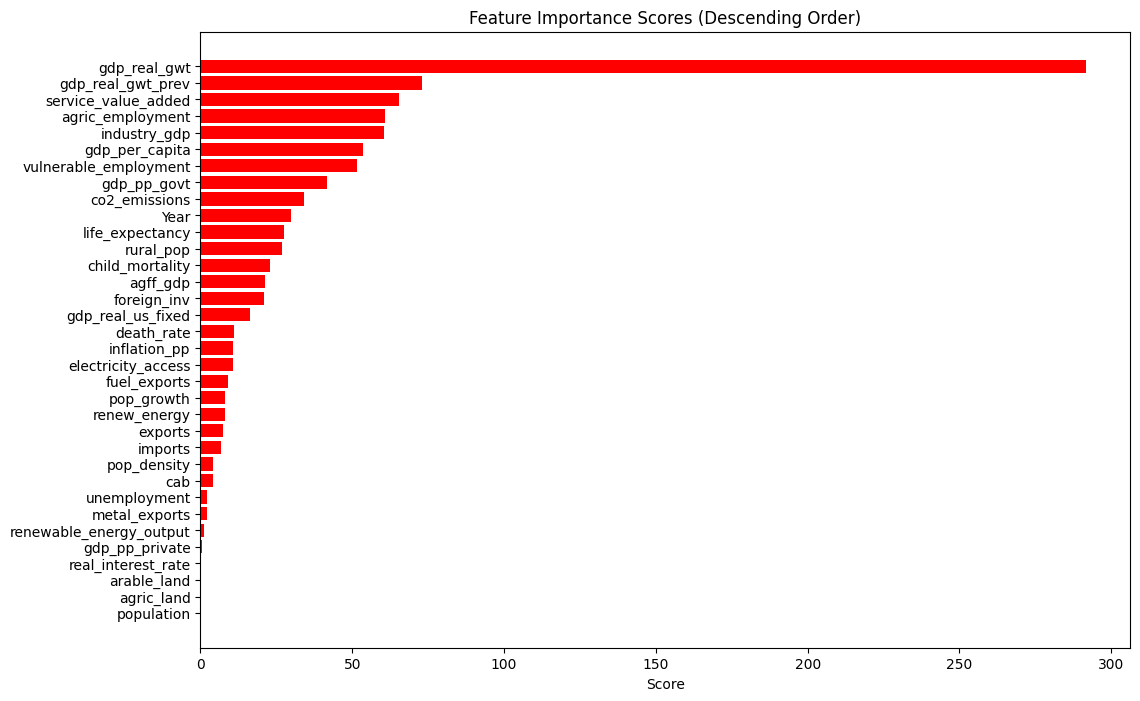

In [65]:
## PLOTTING THE FEATURES SCORES

# Get the scores of all features
scores = selector.scores_

# Get the names of all features
feature_names = X.columns

# Sort the feature names and scores together based on scores
sorted_indices = np.argsort(scores)[::-1]  # Get indices to sort scores in descending order
sorted_scores = scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the feature scores
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names, sorted_scores, color='red')
plt.xlabel('Score')
plt.title('Feature Importance Scores (Descending Order)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score at the top
plt.show()

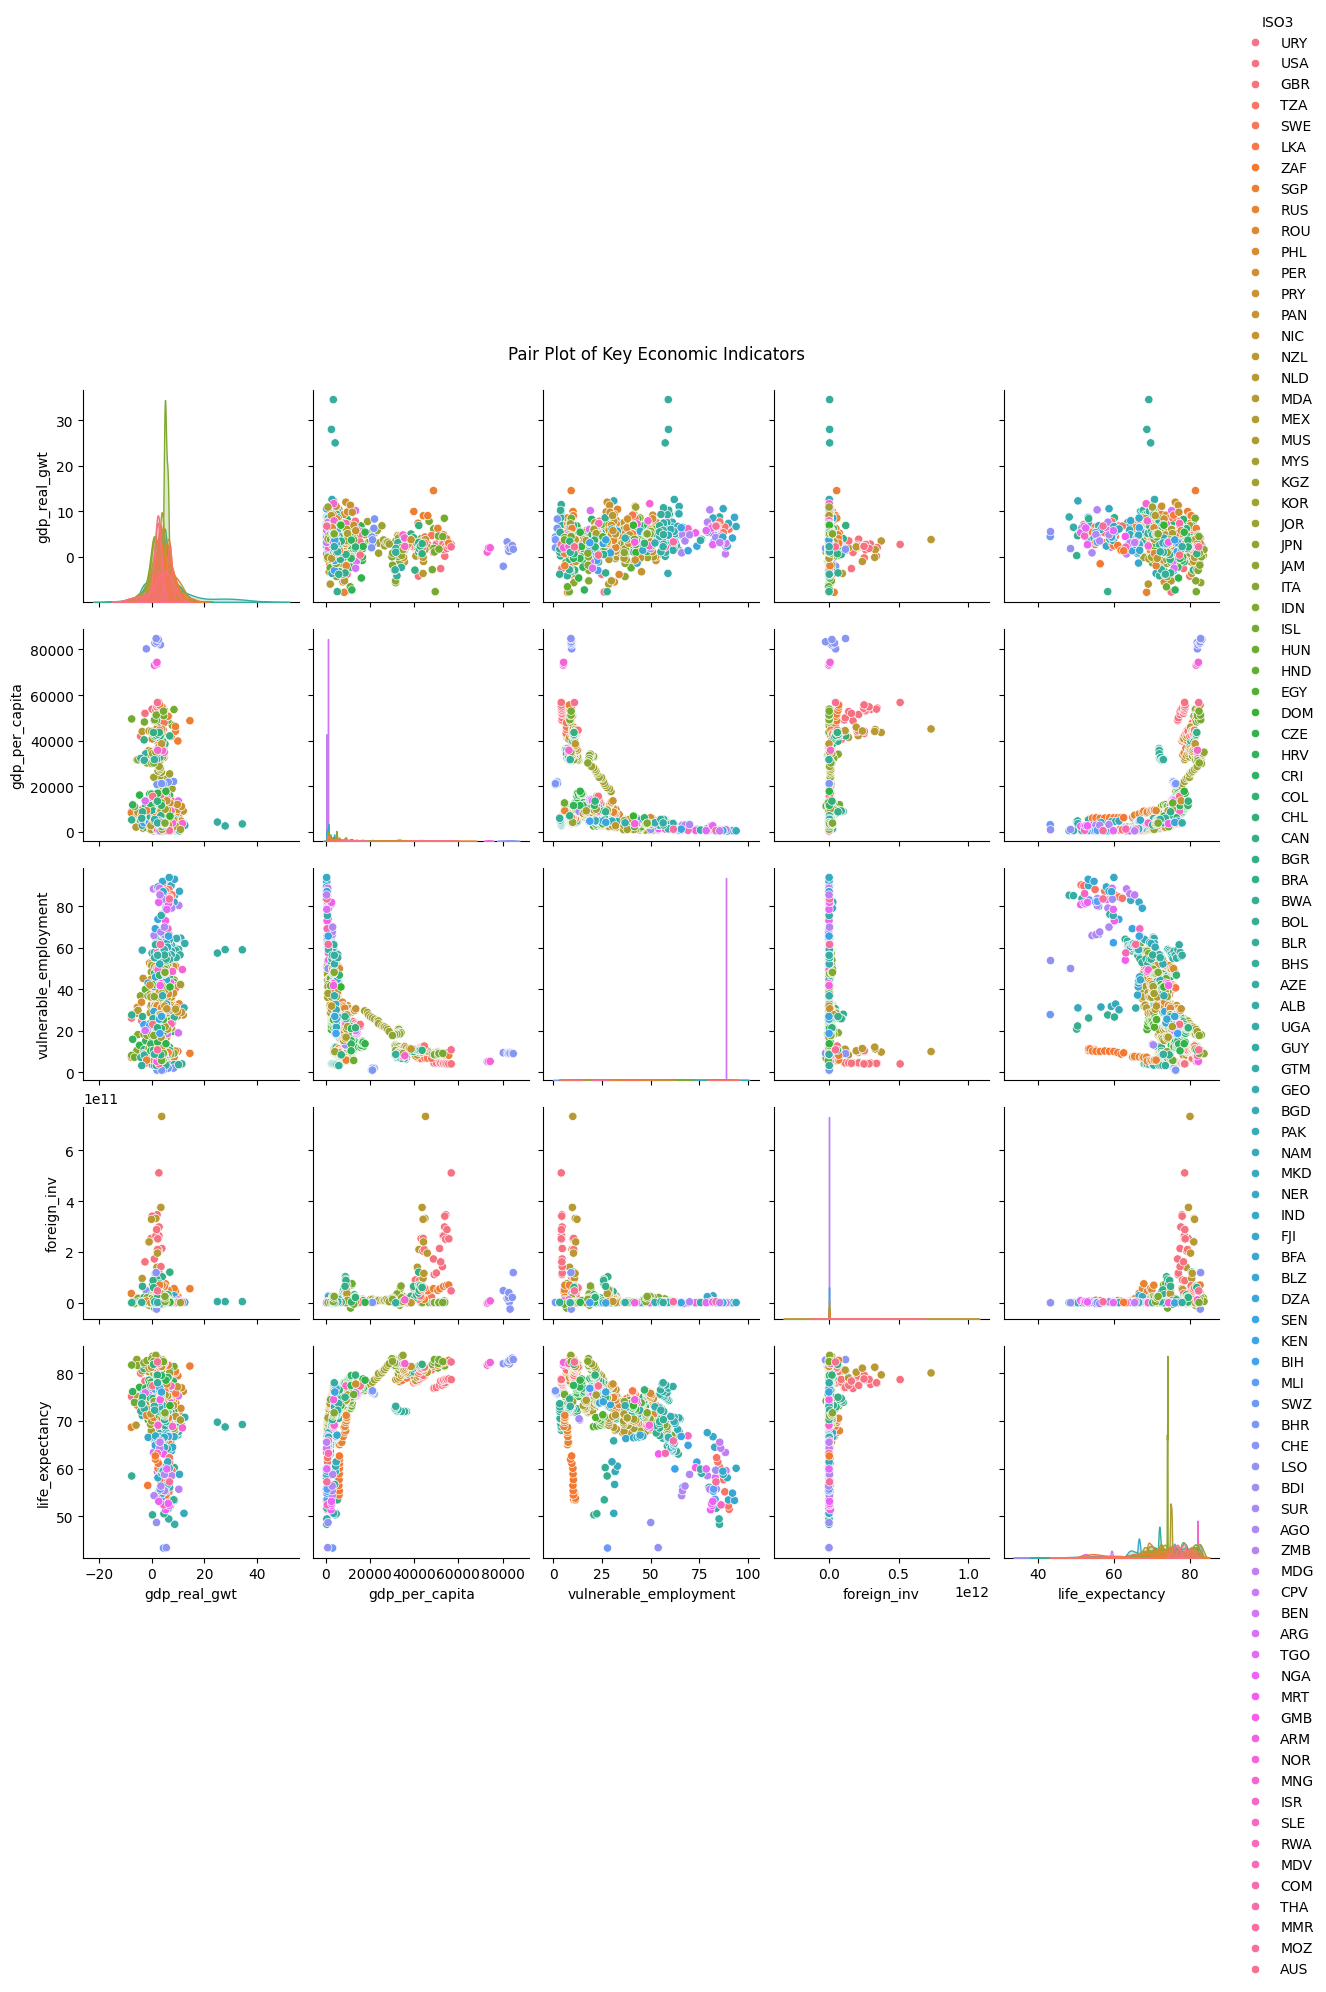

In [76]:
## PAIR PLOT

hue_column = 'ISO3'

sns.pairplot(df[['gdp_real_gwt', 'gdp_per_capita', 'vulnerable_employment', 'foreign_inv', 'life_expectancy', hue_column]], hue=hue_column)
plt.suptitle('Pair Plot of Key Economic Indicators', y=1.02)
plt.show()

In [81]:
## LINE PLOT

fig = px.line(df, x='Year', y=['gdp_real_gwt', 'unemployment'], title='GDP and Unemployment Over Time')
fig.show()

### **TIME SERIES FORECASTING**

Time series forecasting involves predicting future values based on previously observed values in a time-ordered sequence. This technique is widely used in various fields such as finance, economics, supply chain management, and weather forecasting. The goal is to model the underlying structure and patterns in the data, such as trend, seasonality, and cyclic behavior, to make informed predictions about future points in the series.

#### **ARIMA MODEL**

ARIMA (AutoRegressive Integrated Moving Average) is a popular statistical method for time series forecasting. It combines three key components:

1) AutoRegressive (AR) part: This involves regressing the variable on its own lagged (past) values. The number of lagged observations included in the model is denoted by p.

2) Integrated (I) part: This involves differencing the data to make it stationary, i.e., to remove trends and seasonality. The number of differencing required is denoted by d.

3) Moving Average (MA) part: This involves modeling the error term as a linear combination of error terms occurring at different times in the past. The number of lagged forecast errors in the model is denoted by q.



In [85]:
## ARIMA MODEL
## THE GIVEN FUNCTION PERFORMS TIME SERIES FORECASTING OF GDP FOR A SPECIFIED COUNTRY USING THE ARIMA MODEL

def forecast_gdp_by_country(data, country_name):
    # Filter data for the specified country
    country_data = data[data['ISO3'] == country_name]
    
    # Convert 'Year' to datetime format and set it as index
    country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
    country_data.set_index('Year', inplace=True)
    
    # Splitting the data into train and test sets
    train_data = country_data.iloc[:int(0.8*len(country_data))]
    test_data = country_data.iloc[int(0.8*len(country_data)):]

    # Fit the ARIMA model
    model = ARIMA(train_data['gdp_real_gwt_next'], order=(1, 1, 1))
    arima_model = model.fit()

    # Forecast
    forecast = arima_model.forecast(steps=len(test_data))

    # Visualize actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['gdp_real_gwt_next'], label='Training Data')
    plt.plot(test_data.index, test_data['gdp_real_gwt_next'], label='Actual')
    plt.plot(test_data.index, forecast, label='Predicted')
    plt.title(f'ARIMA Forecast for GDP in {country_name}')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.legend()
    plt.show()


#### ***Using the ARIMA model for different countries***

#### ***INDIA***

In [86]:
## CHECKING THE GDP PREDICTIONS FOR INDIA FROM YEAR 2001 TO 2022

df = pd.read_csv("gdp_df_final.csv")

country = 'IND'
filter = df['ISO3'] != country
dfmx = df.drop(df[filter].index, inplace=False)
dfmx

,ISO3,Year,gdp_real_gwt_next,gdp_real_gwt_prev,gdp_real_gwt,gdp_real_us_fixed,gdp_per_capita,gdp_pp_govt,gdp_pp_private,inflation_pp,...,agric_land,agff_gdp,arable_land,rural_pop,electricity_access,fuel_exports,metal_exports,co2_emissions,industry_gdp,service_value_added
75,IND,2001,3.803975,3.840991,4.823966,8.391518e+11,780.606234,11.761450,64.146857,3.215616,...,60.704832,21.618885,53.923564,72.082,55.799999,4.894514,2.991033,0.887014,26.487777,3748.017782
214,IND,2002,7.860381,4.823966,3.803975,8.710729e+11,796.724786,11.314095,63.029647,3.715684,...,60.729385,19.534543,53.959552,71.756,62.299999,4.645978,4.258727,0.901340,27.660654,3856.097174
353,IND,2003,7.922937,3.803975,7.860381,9.395426e+11,845.274844,10.876210,61.503758,3.867798,...,60.624783,19.591998,53.746649,71.428,64.047485,6.100975,3.827162,0.910255,27.474107,3995.417186
492,IND,2004,7.923431,7.860381,7.922937,1.013982e+12,897.628233,10.404702,58.351548,5.725413,...,60.667162,17.814691,53.706961,71.097,64.400002,8.067957,5.804850,0.961090,29.219106,4180.347056
631,IND,2005,8.060733,7.922937,7.923431,1.094324e+12,953.567973,10.366140,57.378730,5.621903,...,60.583414,17.620207,53.627249,70.765,67.579811,10.460158,7.559817,0.990293,29.533764,4405.686705
770,IND,2006,7.660815,7.923431,8.060733,1.182535e+12,1014.627641,9.802470,56.109945,8.400938,...,60.509419,16.809442,53.364232,70.431,67.900002,14.854299,8.027593,1.042663,30.927240,4622.963355
909,IND,2007,3.086698,8.060733,7.660815,1.273126e+12,1075.994087,9.862116,55.760511,6.944418,...,60.413226,16.750120,53.148975,70.094,71.119865,16.189568,7.750497,1.129758,30.903238,4890.789846
1048,IND,2008,7.861889,7.660815,3.086698,1.312424e+12,1093.076551,10.538481,56.676816,9.193970,...,60.459305,16.790942,53.139894,69.754,72.899384,18.064889,6.430190,1.186321,31.136719,5122.032110
1187,IND,2009,8.497585,3.086698,7.861889,1.415605e+12,1162.498808,11.459667,55.959888,7.040365,...,60.563906,16.744270,53.116013,69.413,75.000000,13.586405,6.310706,1.285084,31.121372,5475.869228
1326,IND,2010,5.241315,7.861889,8.497585,1.535898e+12,1244.366016,11.007608,54.724858,10.526031,...,60.397418,17.026509,52.808263,69.070,76.300003,17.229655,7.592408,1.344896,30.725078,5812.648670


***Similarly, we can check the data particularly for other countries as well.***

C:\Users\Parul\AppData\Local\Temp\ipykernel_9292\4036977883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\ba

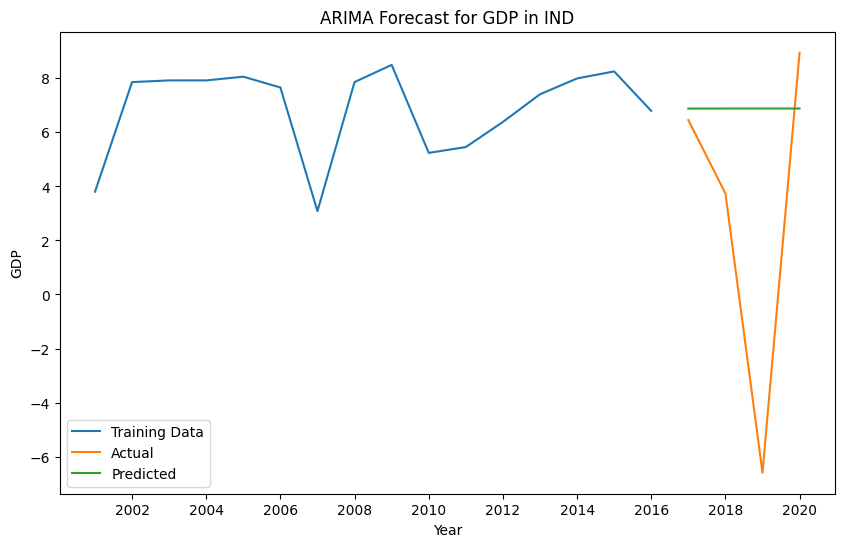

In [51]:
# Load the dataset
data = pd.read_csv('gdp_df_final.csv')

# Specify the country name
country_name = 'IND'

# Call the function to forecast GDP for the specified country
forecast_gdp_by_country(data, country_name)

In [89]:
## EVALUATE THE MODEL

mae = mean_absolute_error(test_data['gdp_real_gwt_next'], forecast)
mse = mean_squared_error(test_data['gdp_real_gwt_next'], forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Mean Absolute Error (MAE): 4.1088
Mean Squared Error (MSE): 38.1134
Root Mean Squared Error (RMSE): 6.1736


#### ***USA***

C:\Users\Parul\AppData\Local\Temp\ipykernel_9292\4036977883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\ba

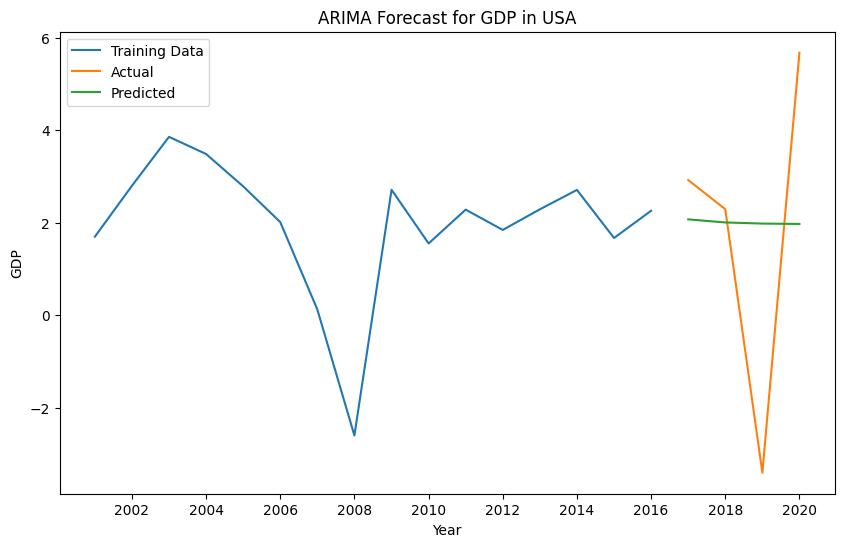

In [56]:
# Load the dataset
data = pd.read_csv('gdp_df_final.csv')

# Specify the country name
country_name = 'USA'

# Call the function to forecast GDP for the specified country
forecast_gdp_by_country(data, country_name)

#### ***AUSTRALIA***

C:\Users\Parul\AppData\Local\Temp\ipykernel_9292\4036977883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\ba

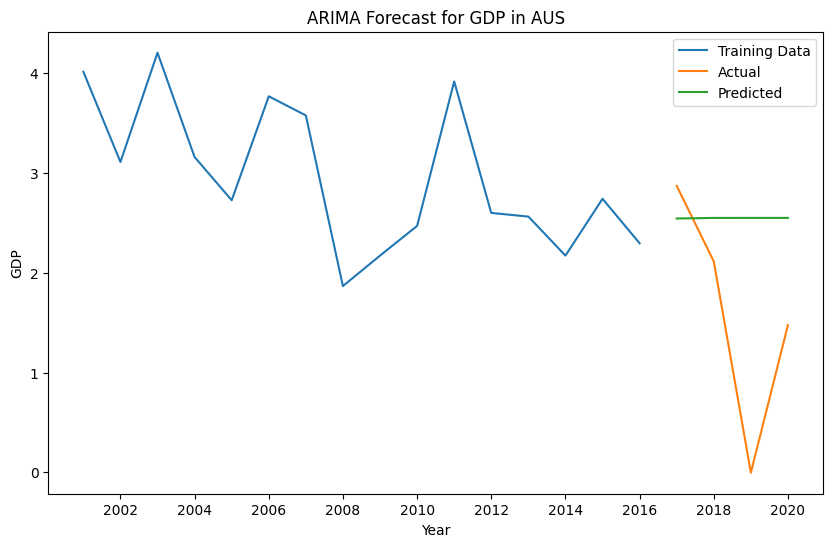

In [60]:
# Load the dataset
data = pd.read_csv('gdp_df_final.csv')

# Specify the country name
country_name = 'AUS'

# Call the function to forecast GDP for the specified country
forecast_gdp_by_country(data, country_name)

#### ***UK***

C:\Users\Parul\AppData\Local\Temp\ipykernel_9292\4036977883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\ba

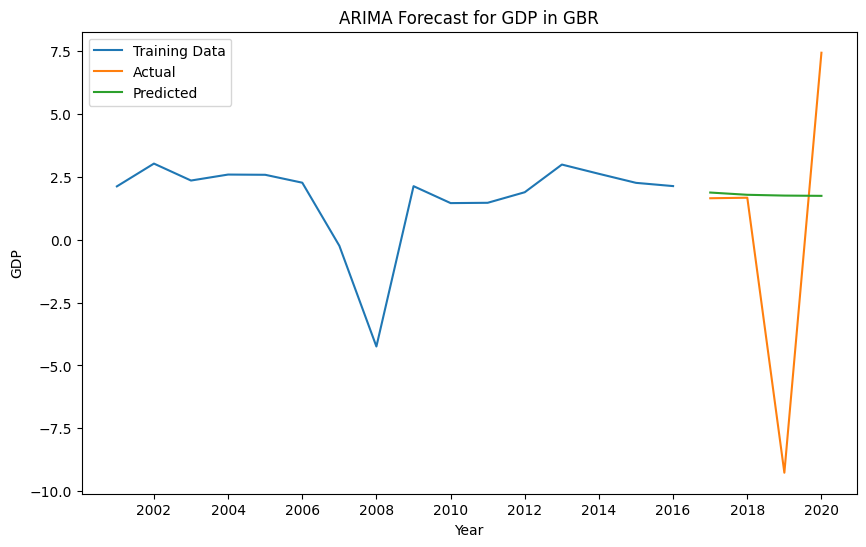

In [62]:
# Load the dataset
data = pd.read_csv('gdp_df_final.csv')

# Specify the country name
country_name = 'GBR'

# Call the function to forecast GDP for the specified country
forecast_gdp_by_country(data, country_name)

### **SARIMA MODEL**

SARIMA (Seasonal AutoRegressive Integrated Moving Average) extends the ARIMA model by explicitly accounting for seasonality in the data. It includes additional seasonal parameters:

1) Seasonal AutoRegressive (SAR) part: This involves regressing the variable on its own lagged values from prior seasons. The seasonal autoregressive order is denoted by P.

2) Seasonal Integrated (SI) part: This involves seasonal differencing to remove seasonal trends. The seasonal differencing order is denoted by D.

3) Seasonal Moving Average (SMA) part: This involves modeling the seasonal error term as a linear combination of past seasonal error terms. The seasonal moving average order is denoted by Q.

4) Seasonal Period (m): This represents the number of time steps for a single seasonal period.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=8.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=13435.102, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=12818.711, Time=1.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=13433.103, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=13437.011, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=12622.727, Time=4.95 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=13.89 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.59 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=12623.172, Time=4.40 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=12624.599, Time=8.46 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=12617.394, Time=23.81 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=12820.456, Time=3.83 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=27.24 sec
 ARIMA(1,0,1)(1,1,1)[12] interce

c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an

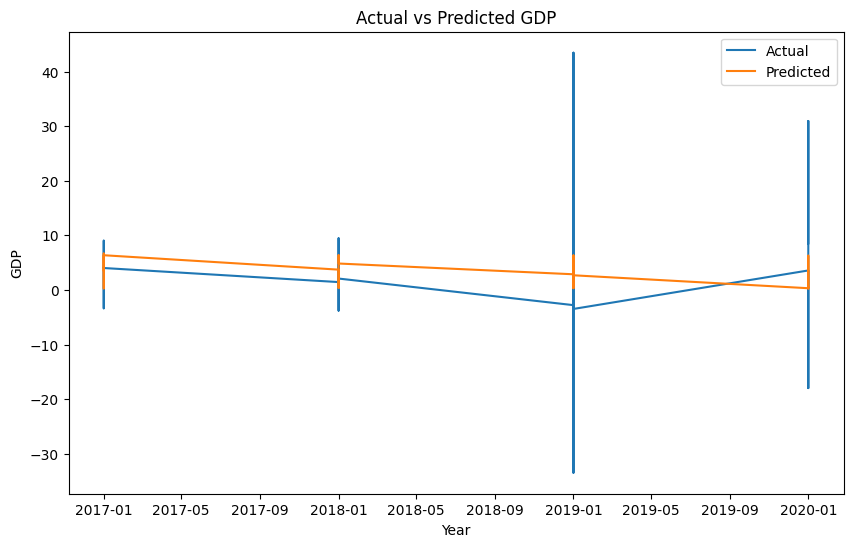

In [82]:
## SARIMA MODEL

# Load the dataset
data = pd.read_csv('gdp_df_final.csv')

# Convert 'Year' to datetime format and set it as index
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Splitting the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Using auto_arima to find optimal SARIMA parameters
stepwise_model = auto_arima(train_data['gdp_real_gwt_next'], start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print(stepwise_model.summary())

# Fit the SARIMA model
model = SARIMAX(train_data['gdp_real_gwt_next'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarima_model = model.fit(disp=-1)

# Forecast
forecast = sarima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['gdp_real_gwt_next'], label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.title('Actual vs Predicted GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()


In [84]:
## EVALUATE THE MODEL

mse = mean_squared_error(test_data['gdp_real_gwt_next'], forecast)
print("Mean Squared Error:", mse)

Mean Squared Error: 38.11335442241498


***CONCLUSION:***

***In this GDP forecasting project, both ARIMA and SARIMA models were evaluated to predict future GDP values based on historical data. The ARIMA model, designed to handle non-seasonal data, effectively captured the underlying trends and provided reasonable forecasts.***

***On the other hand, the SARIMA model, an extension of ARIMA that accounts for seasonality, offers enhanced predictive power for data with seasonal patterns.***

***Overall, the project demonstrated the utility of time series models in economic forecasting. The ARIMA model proved to be a robust tool for GDP prediction, while the SARIMA model holds potential for more complex datasets with seasonal components. Future work could explore the benefits of SARIMA and other advanced models to refine and enhance GDP forecasts.***